## **For Ph = 0.25**

### **Initialization:**

In [ ]:
# importing libraries:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
p_h = 0.25                # the probablity of seeing head
gamma = 1                 # discount factor
thr = 1e-5                 # threshold for evaluating stop condition
rewards = np.zeros(101)  
rewards[100] = 1           # just the reward of gaining 100 dollar is +1 and for the others is 0
values = np.zeros(101)     # the amount of money the gambler has at the moment 
states = np.arange(1,100)   # states

In [ ]:
# A function for calculating the value in each state:
def Value_Update(p_h, gamma, state, values, rewards):
  new_values = np.zeros(101)
  for bet in range(1, min(state, 100-state)+1):   # finding new value by evaluating different amount of bet
    val_next_s = values[state+bet]
    val_prev_s = values[state-bet]
    new_values[bet] = p_h*(rewards[state+bet] + val_next_s*gamma) + (1-p_h)*(rewards[state-bet] + val_prev_s*gamma)
  return new_values

# ----------------------------------------------------------------------------------------------------------------------------------------------
# A function for doing the value iteration algorithm:
def Value_Iteration(p_h, gamma, thr, states, values, rewards):
  for i in range(1000):
    delta = 0
    for s in states:
      # Calculate new value in each state:
      new_values = Value_Update(p_h, gamma, s, values, rewards)
      new_value = np.max(new_values)
      # Updating delta in each state:
      delta = max(delta, np.abs(new_value - values[s]))
      # Updating the value in state s:
      values[s] = new_value
    # Checking the stop condition by the given threshold:
    if delta < thr:
      break
    
  # Calculating the policies for each state:
  policies = np.zeros(100)
  for s in states:
    new_values = Value_Update(p_h, gamma, s, values, rewards)
    action = np.argmax(new_values)
    policies[s] = action

  return values, policies

# ----------------------------------------------------------------------------------------------------------------------------------------------
# A function for showing the final results:
def Results(states, values, policies):
  Vals = values[:99]
  print("Final Optimized Policy:")
  print(policies)
  plt.figure()
  plt.bar(states, policies, align = 'center', alpha = 0.5)
  plt.xlabel('Wealth in each state')
  plt.ylabel('Final Optimized Policy')
  plt.title('Graph of Optimized Policy')

  plt.figure()
  plt.plot(states, Vals)
  plt.xlabel('Wealth in each state')
  plt.ylabel('Value Estimates')
  plt.title('Graph of Value Estimates')

### **Implementing the algorithm:**

Final Optimized Policy:
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 11. 10.  9. 17.  7.
 19.  5. 21. 22. 23. 24. 25.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.
 12. 38. 11. 40.  9.  8. 43. 44. 45.  4. 47.  2.  1. 50.  1.  2.  3.  4.
  5.  6.  7.  8.  9. 10. 11. 12. 13. 11. 15.  9.  8. 18. 19. 20.  4. 22.
  2.  1. 25.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 12. 11. 10.
  9.  8.  7.  6.  5.  4.  3.  2.  1.]


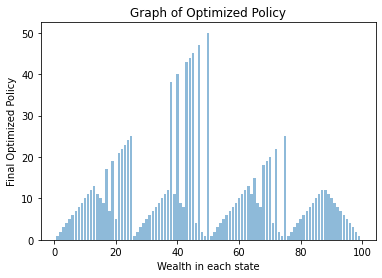

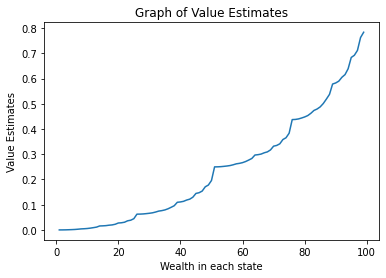

In [ ]:
value_list, policies = Value_Iteration(p_h, gamma, thr, states, values, rewards)
Results(states, value_list, policies[1:])

## **For Ph = 0.55**

In [ ]:
p_h = 0.55                # the probablity of seeing head
gamma = 1                 # discount factor
thr = 1e-4                 # threshold for evaluating stop condition
rewards = np.zeros(101)  
rewards[100] = 1           # just the reward of gaining 100 dollar is +1 and for the others is 0
values = np.zeros(101)     # the amount of money the gambler has at the moment 
states = np.arange(1,100)   # states

Final Optimized Policy:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1.]


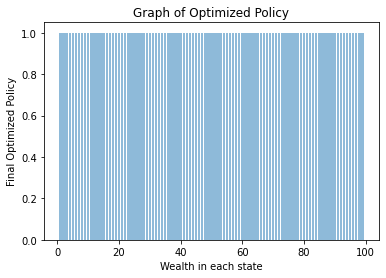

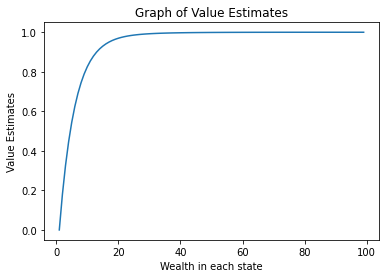

In [ ]:
value_list, policies = Value_Iteration(p_h, gamma, thr, states, values, rewards)
Results(states, value_list, policies[1:])